# Dimensionality Reduction using Heart Disease Dataset

Dataset Link: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

Isi Dataset:
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

## 1. Load Dataset

ChatGPT Prompt: Saya ingin membuat kode di notebook kaggle. Berikan saya kode untuk membaca dataset di kaggle dengan file path /kaggle/input/heart-disease-dataset/heart.csv

In [1]:
import pandas as pd

# Ganti path dengan path sesuai dengan lokasi dataset di Kaggle kernel Anda
file_path = "/kaggle/input/heart-disease-dataset/heart.csv"

# Membaca dataset ke dalam DataFrame menggunakan pandas
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari DataFrame
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 2. PCA

ChatGPT Prompt: Berikan saya code untuk mereduksi dimensi dataset dengan metode PCA menggunakan library scikit-learn. Kemudian, print hasil PCA dan visualisasikanlah hasilnya

Hasil PCA:
      PCA-1     PCA-2  target
0 -0.523629 -1.102198       0
1  2.589579 -0.524516       0
2  3.042828 -1.332114       0
3 -0.493217 -0.270081       0
4  2.186354  1.961107       0


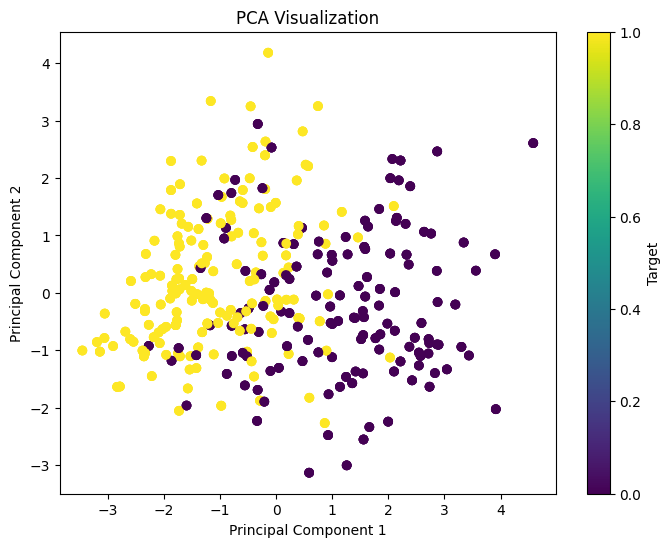

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur (X) dan target (y) jika diperlukan
X = df.drop('target', axis=1)
y = df['target']

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Inisialisasi objek PCA dengan jumlah komponen yang diinginkan (misalnya, 2 komponen)
n_components = 2
pca = PCA(n_components=n_components, random_state=42)

# Terapkan PCA ke data yang telah dinormalisasi
X_pca = pca.fit_transform(X_scaled)

# Hasilkan DataFrame baru dari hasil PCA
pca_df = pd.DataFrame(data=X_pca, columns=[f'PCA-{i+1}' for i in range(n_components)])

# Gabungkan dengan target (jika perlu)
pca_df['target'] = y

# Cetak hasil PCA
print("Hasil PCA:")
print(pca_df.head())

# Visualisasikan hasil PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA-1'], pca_df['PCA-2'], c=pca_df['target'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.colorbar(label='Target')
plt.show()

## 3. t-SNE

ChatGPT Prompt: Berikan saya code untuk mereduksi dimensi dataset dengan metode t-SNE menggunakan library scikit-learn. Kemudian, print hasil t-SNE dan visualisasikanlah hasilnya

Hasil t-SNE:
         Dim1       Dim2  target
0  -48.717609 -74.064995       0
1  162.580429 -56.164394       0
2  168.454727 -22.889963       0
3  -39.277512 -65.960144       0
4   78.806267  74.800438       0


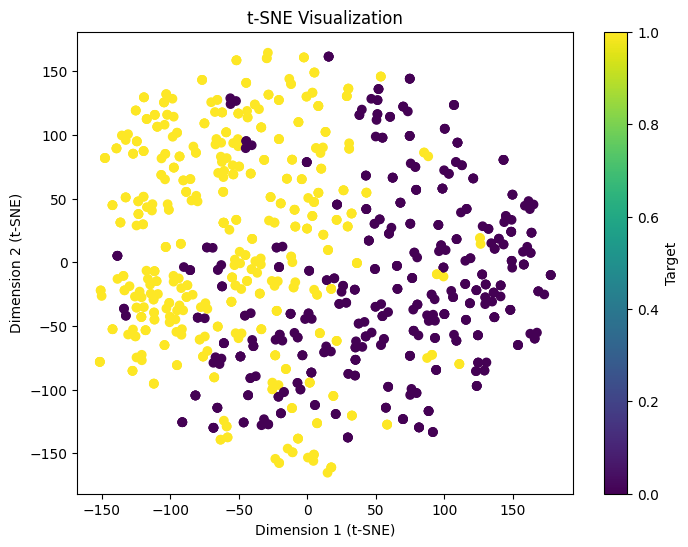

In [10]:
from sklearn.manifold import TSNE

# Pisahkan fitur (X) dan target (y) jika diperlukan
X = df.drop('target', axis=1)
y = df['target']

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tentukan jumlah dimensi yang diinginkan (biasanya 2 untuk visualisasi)
n_components = 2

# Inisialisasi objek t-SNE
tsne = TSNE(n_components=n_components, random_state=42)

# Terapkan t-SNE ke data yang telah dinormalisasi
X_tsne = tsne.fit_transform(X_scaled)

# Hasilkan DataFrame baru dari hasil t-SNE
tsne_df = pd.DataFrame(data=X_tsne, columns=[f'Dim{i+1}' for i in range(n_components)])

# Gabungkan dengan target (jika perlu)
tsne_df['target'] = y

# Cetak hasil t-SNE
print("Hasil t-SNE:")
print(tsne_df.head())

# Visualisasikan hasil t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['Dim1'], tsne_df['Dim2'], c=tsne_df['target'], cmap='viridis')
plt.xlabel('Dimension 1 (t-SNE)')
plt.ylabel('Dimension 2 (t-SNE)')
plt.title('t-SNE Visualization')
plt.colorbar(label='Target')
plt.show()

## 4. SVD

ChatGPT Prompt: Berikan saya code untuk mereduksi dimensi dataset dengan metode SVD menggunakan library scikit-learn. Kemudian, print hasil SVD dan visualisasikanlah hasilnya

        SVD-1      SVD-2  target
0  300.283557 -34.681842       0
1  293.600693 -37.064127       0
2  262.295441 -37.502746       0
3  300.930002 -44.764302       0
4  342.192213  52.969155       0


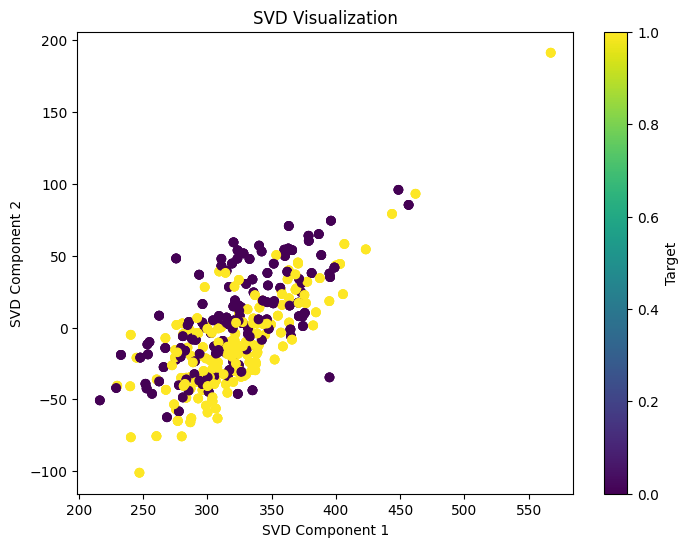

In [9]:
from sklearn.decomposition import TruncatedSVD

# Pisahkan fitur (X) dan target (y) jika diperlukan
X = df.drop('target', axis=1)
y = df['target']

# Inisialisasi objek SVD dengan jumlah komponen yang diinginkan (misalnya, 2 komponen)
n_components = 2
svd = TruncatedSVD(n_components=n_components, random_state=42)

# Terapkan SVD ke data
X_svd = svd.fit_transform(X)

# Hasilkan DataFrame baru dari hasil SVD
svd_df = pd.DataFrame(data=X_svd, columns=[f'SVD-{i+1}' for i in range(n_components)])

# Gabungkan dengan target (jika perlu)
svd_df['target'] = y

# Cetak hasil SVD
print("Hasil SVD:")
print(svd_df.head())

# Visualisasikan hasil SVD
plt.figure(figsize=(8, 6))
plt.scatter(svd_df['SVD-1'], svd_df['SVD-2'], c=svd_df['target'], cmap='viridis')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.title('SVD Visualization')
plt.colorbar(label='Target')
plt.show()